In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm, tree, ensemble, naive_bayes, neural_network, neighbors


In [3]:
# Loading the Data
legitimate_data = pd.read_csv("strucutred_legitimate_data.csv")
phishing_data = pd.read_csv("structured_phishing_data.csv")

In [4]:
# Combine legitimate and phishing dataframes, and shuffle
url_data = pd.concat([legitimate_data, phishing_data], axis=0)
# Shuffle the DataFrame
url_data = url_data.sample(frac=1)

# Saving the output file and its path
output_file_path = "combined_urls_data.csv"

# Saving the data from combined data to csv 
url_data.to_csv(output_file_path, index=False)

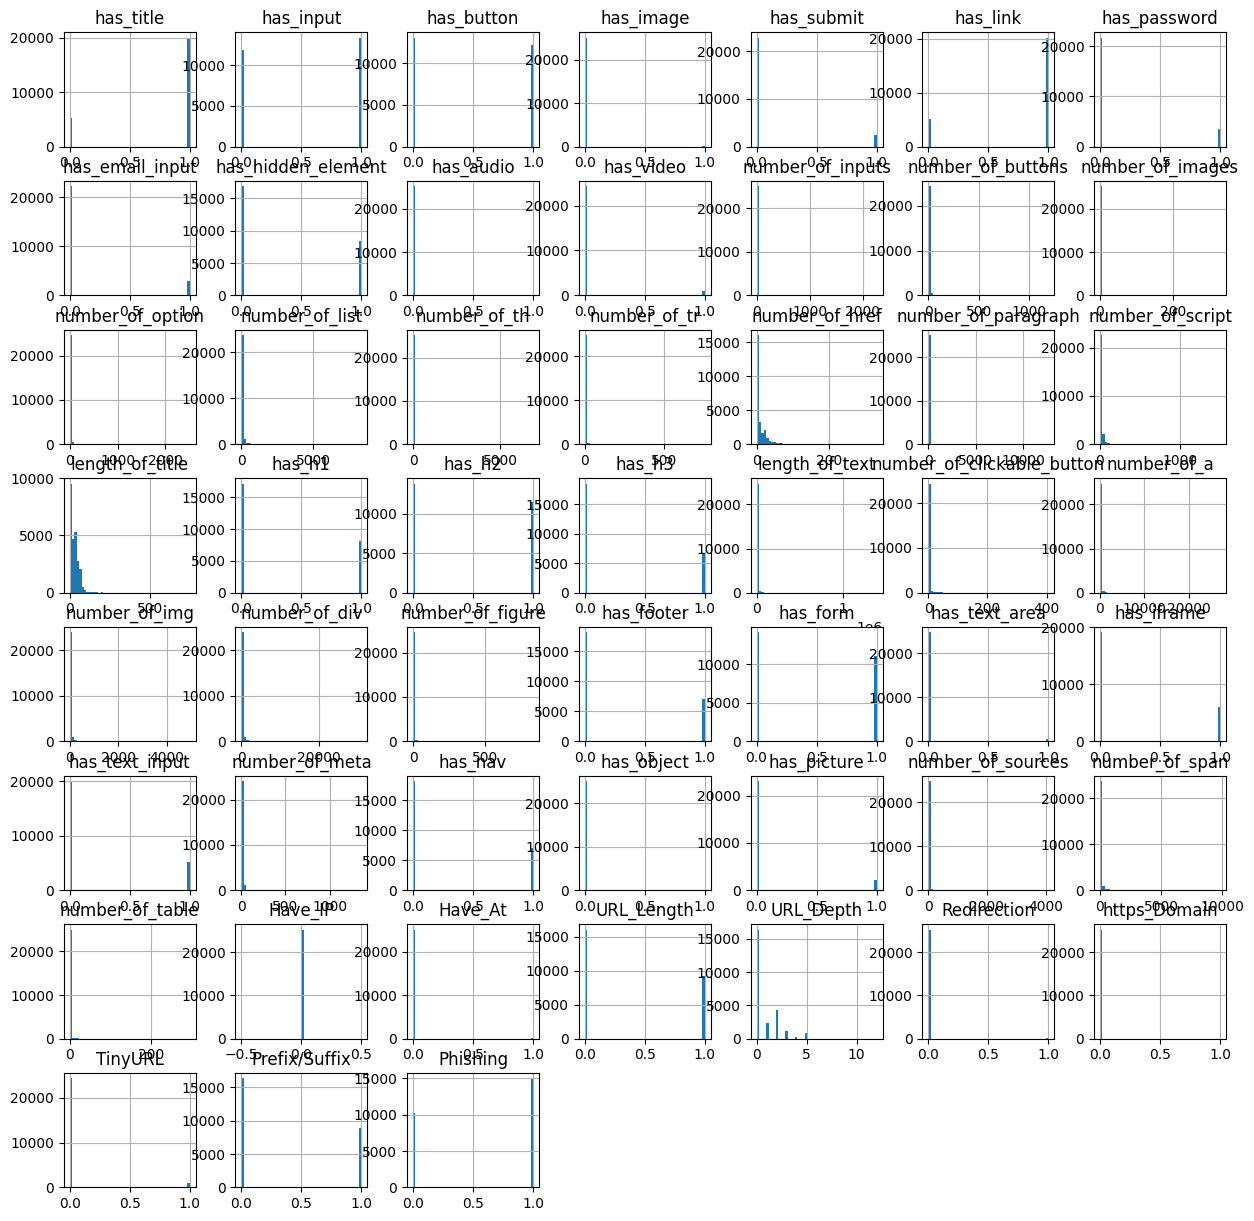

In [5]:
# Plotting the data distribution
url_data.hist(bins=50, figsize=(15, 15))
plt.show()

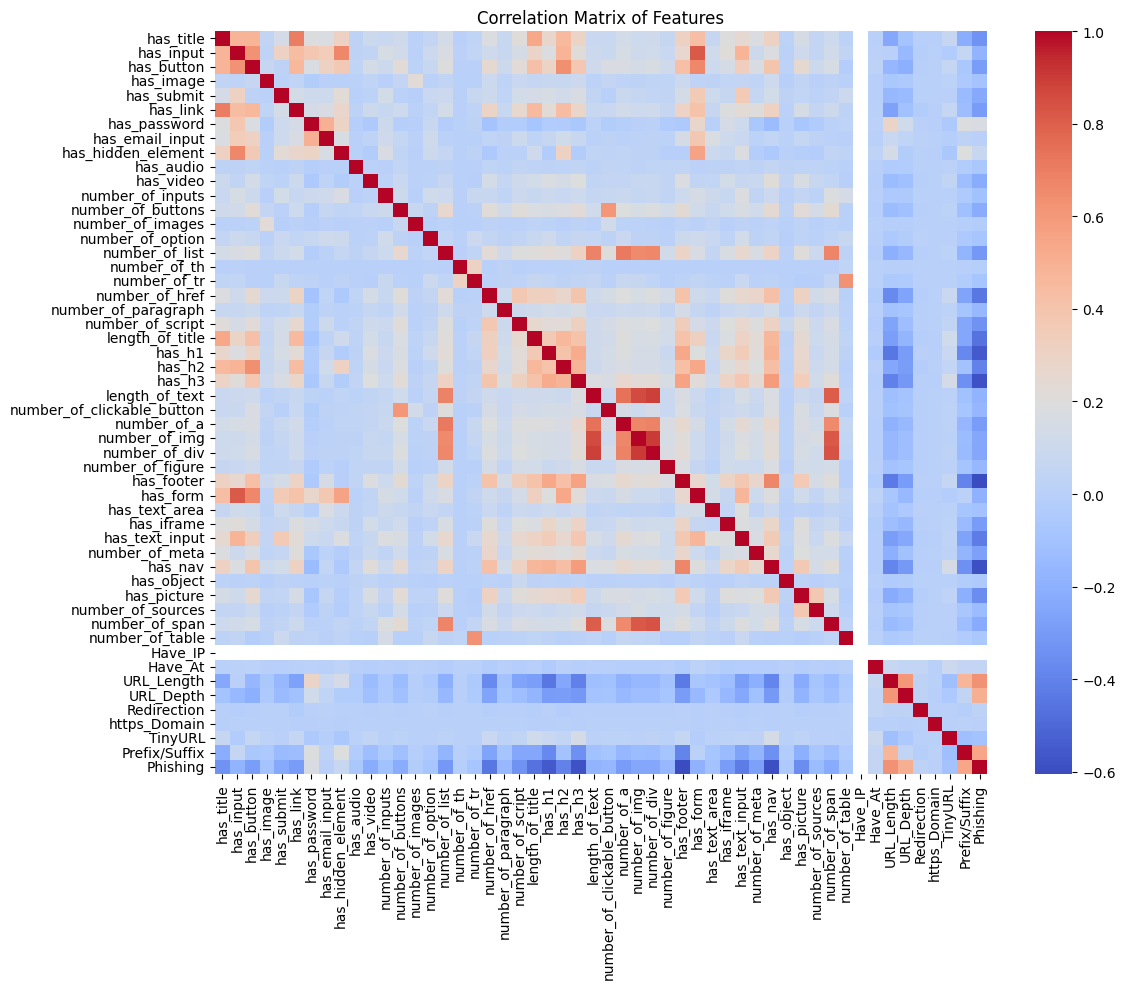

In [6]:
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

# Calculate the correlation matrix
correlation_matrix = url_data.drop('URL', axis=1).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.tight_layout()  # Adjust the plot to ensure the fit of the heatmap
plt.show()

In [7]:
# Display  DataFrame information
data_info = url_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25227 entries, 12863 to 7854
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   URL                         25227 non-null  object
 1   has_title                   25227 non-null  int64 
 2   has_input                   25227 non-null  int64 
 3   has_button                  25227 non-null  int64 
 4   has_image                   25227 non-null  int64 
 5   has_submit                  25227 non-null  int64 
 6   has_link                    25227 non-null  int64 
 7   has_password                25227 non-null  int64 
 8   has_email_input             25227 non-null  int64 
 9   has_hidden_element          25227 non-null  int64 
 10  has_audio                   25227 non-null  int64 
 11  has_video                   25227 non-null  int64 
 12  number_of_inputs            25227 non-null  int64 
 13  number_of_buttons           25227 non-null 

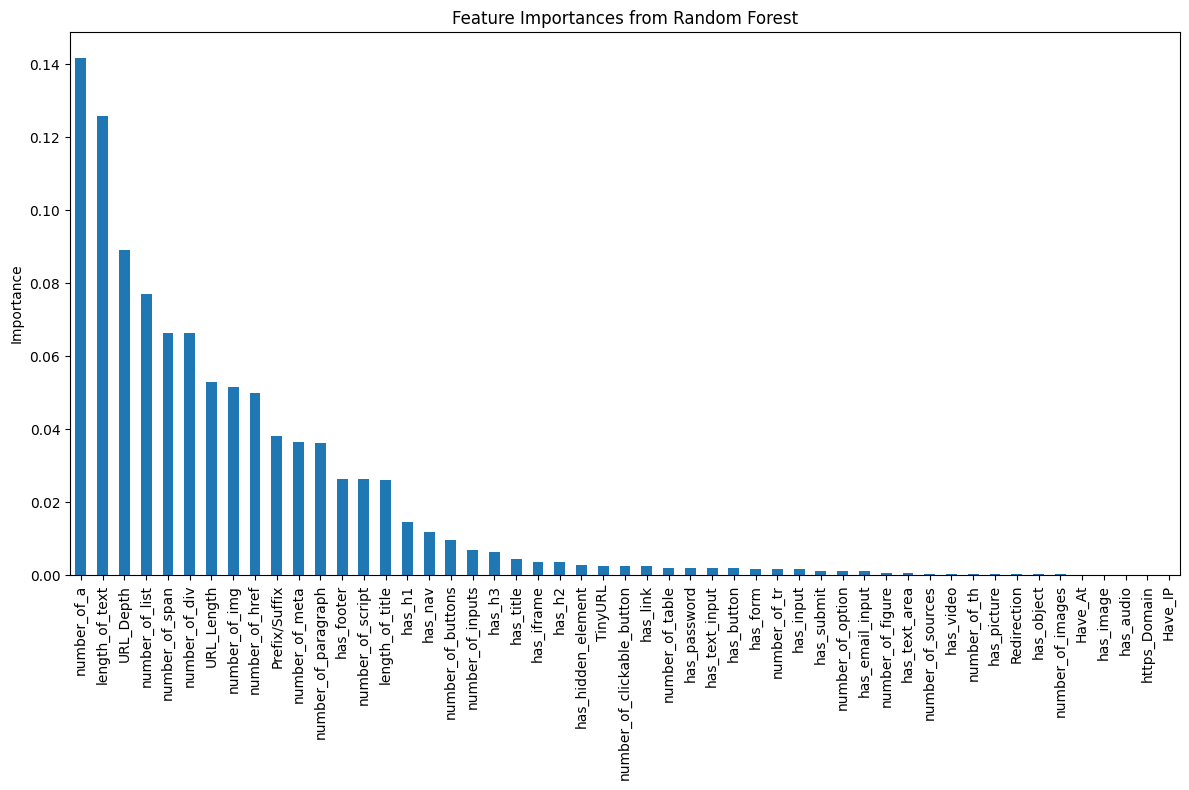

In [8]:
# Train a random forest classifier to get feature importances
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(url_data.drop(['URL', 'Phishing'], axis=1), url_data['Phishing'])

# Get feature importances from the random forest model
feature_importances = pd.Series(rf_clf.feature_importances_, index=url_data.drop(['URL', 'Phishing'], axis=1).columns)

# Plot the feature importances
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [9]:

# Return the features and their importance scores
feature_importance_scores = feature_importances.sort_values(ascending=False)
feature_importance_scores

number_of_a                   0.141680
length_of_text                0.125860
URL_Depth                     0.089003
number_of_list                0.077036
number_of_span                0.066440
number_of_div                 0.066317
URL_Length                    0.052948
number_of_img                 0.051624
number_of_href                0.049841
Prefix/Suffix                 0.038131
number_of_meta                0.036389
number_of_paragraph           0.036131
has_footer                    0.026411
number_of_script              0.026193
length_of_title               0.025918
has_h1                        0.014540
has_nav                       0.011813
number_of_buttons             0.009603
number_of_inputs              0.006873
has_h3                        0.006265
has_title                     0.004395
has_iframe                    0.003626
has_h2                        0.003528
has_hidden_element            0.002808
TinyURL                       0.002575
number_of_clickable_butto

In [10]:
# Display Dataframe columns information
url_data.columns

Index(['URL', 'has_title', 'has_input', 'has_button', 'has_image',
       'has_submit', 'has_link', 'has_password', 'has_email_input',
       'has_hidden_element', 'has_audio', 'has_video', 'number_of_inputs',
       'number_of_buttons', 'number_of_images', 'number_of_option',
       'number_of_list', 'number_of_th', 'number_of_tr', 'number_of_href',
       'number_of_paragraph', 'number_of_script', 'length_of_title', 'has_h1',
       'has_h2', 'has_h3', 'length_of_text', 'number_of_clickable_button',
       'number_of_a', 'number_of_img', 'number_of_div', 'number_of_figure',
       'has_footer', 'has_form', 'has_text_area', 'has_iframe',
       'has_text_input', 'number_of_meta', 'has_nav', 'has_object',
       'has_picture', 'number_of_sources', 'number_of_span', 'number_of_table',
       'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Phishing'],
      dtype='object')

In [11]:
# Display summary statistics of the DataFrame
url_data.describe()


,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,...,number_of_table,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Phishing
count,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,...,25227.000000,25227.0,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000
mean,0.792088,0.528759,0.483252,0.006897,0.095731,0.800135,0.142229,0.117612,0.332699,0.002973,...,0.325722,0.0,0.004479,0.365481,0.779958,0.001150,0.000079,0.035280,0.351964,0.594601
std,0.405822,0.499182,0.499729,0.082765,0.294227,0.399907,0.349291,0.322155,0.471189,0.054445,...,3.971867,0.0,0.066779,0.481574,1.268572,0.033886,0.008904,0.184489,0.477592,0.490979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,295.000000,0.0,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Dropping the unnecessary columns
url_data = url_data.drop([ 'URL'], axis=1).copy()

#Feature selection: Let's consider features with importance greater than the mean importance
important_features = feature_importance_scores[feature_importance_scores > feature_importance_scores.mean()].index.tolist()

# Reduce the dataset to only important features
X_reduced = url_data[important_features]
y = url_data['Phishing']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)


# Checking the data for null or missing values
null_counts = url_data.isnull().sum()

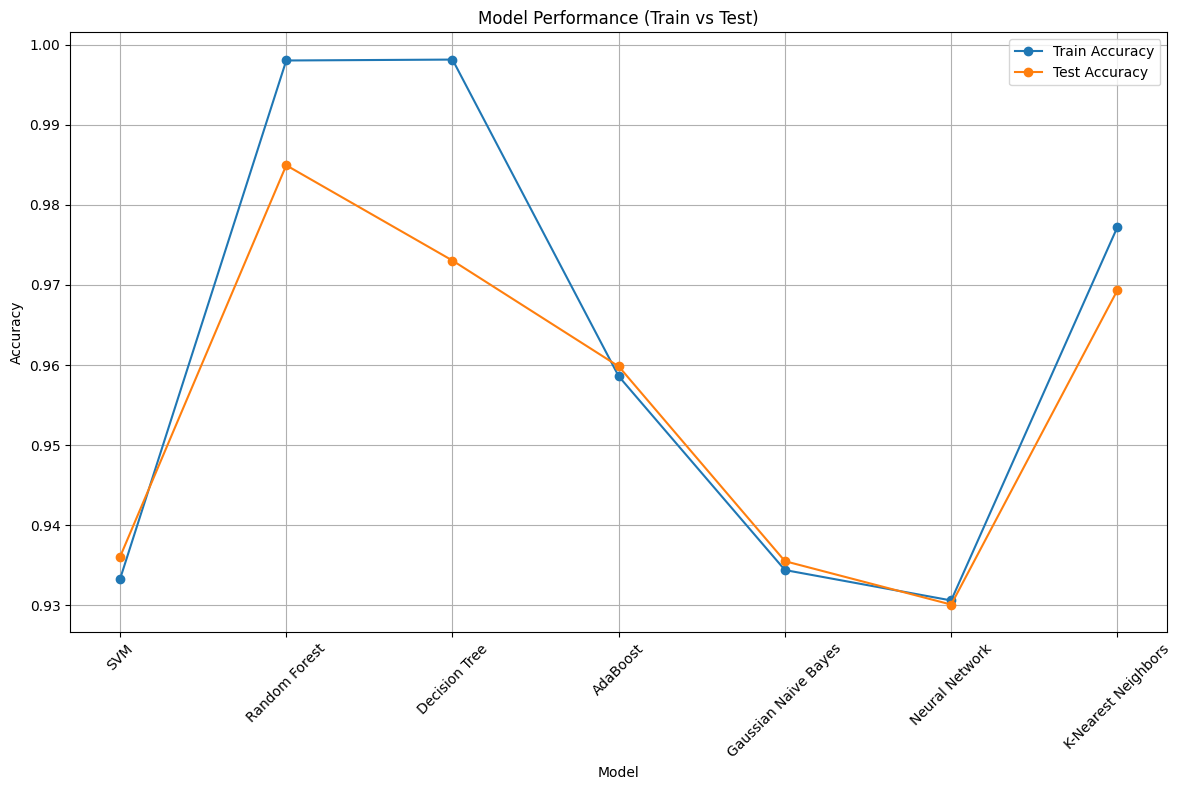

                  Model  Train Accuracy  Train Precision  Train Recall  \
0                   SVM        0.933288         0.958497      0.928259   
1         Random Forest        0.998018         0.997817      0.998860   
2         Decision Tree        0.998131         0.998290      0.998575   
3              AdaBoost        0.958602         0.968251      0.962087   
4  Gaussian Naive Bayes        0.934421         0.912236      0.984702   
5        Neural Network        0.930626         0.928802      0.956956   
6   K-Nearest Neighbors        0.977234         0.982092      0.979666   

   Train F1-score  Test Accuracy  Test Precision  Test Recall  Test F1-score  
0        0.943136       0.936055        0.955084     0.935880       0.945385  
1        0.998338       0.984939        0.991659     0.982797       0.987208  
2        0.998432       0.973048        0.972357     0.982350       0.977328  
3        0.965159       0.959836        0.967085     0.964924       0.966003  
4        0.9

In [14]:
# Create a dictionary of models
models = {
    'SVM': svm.LinearSVC(dual=False, max_iter=20000),
    'Random Forest': ensemble.RandomForestClassifier(n_estimators=60),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'AdaBoost': ensemble.AdaBoostClassifier(),
    'Gaussian Naive Bayes': naive_bayes.GaussianNB(),
    'Neural Network': neural_network.MLPClassifier(alpha=1, max_iter=20000),
    'K-Nearest Neighbors': neighbors.KNeighborsClassifier()
}

# Initialize results dictionary
model_results = {'Model': [], 'Train Accuracy': [], 'Train Precision': [], 'Train Recall': [],
                 'Train F1-score': [], 'Test Accuracy': [], 'Test Precision': [], 'Test Recall': [],
                 'Test F1-score': []}



# Scaling  the features


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop over each model

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions on train and test set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    # Append results to dictionary
    model_results['Model'].append(model_name)
    model_results['Train Accuracy'].append(train_accuracy)
    model_results['Train Precision'].append(precision_train)
    model_results['Train Recall'].append(recall_train)
    model_results['Train F1-score'].append(f1_train)
    model_results['Test Accuracy'].append(test_accuracy)
    model_results['Test Precision'].append(precision_test)
    model_results['Test Recall'].append(recall_test)
    model_results['Test F1-score'].append(f1_test)

# Convert results to DataFrame
results_data_frame = pd.DataFrame(model_results)

# Plotting Train vs Test performance
plt.figure(figsize=(12, 8))
plt.plot(results_data_frame['Model'], results_data_frame['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_data_frame['Model'], results_data_frame['Test Accuracy'], marker='o', label='Test Accuracy')
plt.title('Model Performance (Train vs Test)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the  results
print(results_data_frame)

# Calculating the mean performance for all models
mean_results = results_data_frame.mean(numeric_only=True)
print("\nMean Performance Metrics Across Models:")
print(mean_results)


In [15]:
# Determine the best performing model based on a selected metric (like accuracy)
best_model = results_data_frame.loc[results_data_frame['Test Accuracy'].idxmax()]

# Display the performance metrics summary
print("\nMean Performance Metrics Across Models:")
print(mean_results)

# Display the best performing model in terms of Test Accuracy
print("\nBest Performing Model (on the basis of Test Accuracy):")
print(best_model)


Mean Performance Metrics Across Models:
Train Accuracy     0.961474
Train Precision    0.963712
Train Recall       0.972729
Train F1-score     0.967956
Test Accuracy      0.955552
Test Precision     0.957096
Test Recall        0.968977
Test F1-score      0.962783
dtype: float64

Best Performing Model (on the basis of Test Accuracy):
Model              Random Forest
Train Accuracy          0.998018
Train Precision         0.997817
Train Recall             0.99886
Train F1-score          0.998338
Test Accuracy           0.984939
Test Precision          0.991659
Test Recall             0.982797
Test F1-score           0.987208
Name: 1, dtype: object
